In [1]:
import os
#list the files
filelist = os.listdir('30_speakers_train') 
#read them into pandas
train_df = pd.DataFrame(filelist)

In [2]:
train_df.head()

,0
0,201-122255-0038.flac
1,196-122152-0003.flac
2,405-130894-0036.flac
3,60-121082-0026.flac
4,26-495-0001.flac


In [ ]:
features_train = []
for i in range(0, len(train_features_speaker)):
    features_train.append(np.concatenate((
        train_features_speaker[i][0],
        train_features_speaker[i][1], 
        train_features_speaker[i][2], 
        train_features_speaker[i][3],
        train_features_speaker[i][4]), axis=0))

In [3]:
# Renaming the column name to file
train_df = train_df.rename(columns={0:'file'})

In [4]:
train_df[train_df['file']=='.DS_Store']

,file
16,.DS_Store


In [5]:
train_df.drop(16, inplace=True)

In [6]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [7]:
train_df

,file
0,163-122947-0041.flac
1,87-121553-0059.flac
2,198-126831-0037.flac
3,26-495-0000.flac
4,229-130880-0025.flac
...,...
115,289-121665-0022.flac
116,163-122947-0045.flac
117,39-121914-0012.flac
118,201-122255-0043.flac


In [8]:
# We create an empty list where we will append all the speakers ids for each row of our dataframe by slicing the file name since we know the id is the first numbers before the hash
speaker = []
for i in range(0, len(train_df)):
    speaker.append(train_df['file'][i].split('-')[0])

In [9]:
train_df['speaker'] = speaker

In [10]:
train_df.head()

,file,speaker
0,163-122947-0041.flac,163
1,87-121553-0059.flac,87
2,198-126831-0037.flac,198
3,26-495-0000.flac,26
4,229-130880-0025.flac,229


In [11]:
filelist = os.listdir('30_speakers_val') 
#read them into pandas
val_df = pd.DataFrame(filelist)

In [12]:
val_df

,0
0,200-124140-0004.flac
1,201-127786-0002.flac
2,78-368-0045.flac
3,250-142286-0004.flac
4,374-180298-0021.flac
...,...
86,78-368-0046.flac
87,118-47824-0067.flac
88,125-121124-0042.flac
89,19-198-0017.flac


In [13]:
val_df = val_df.rename(columns={0:'file'})

In [14]:
val_df[val_df['file']=='.DS_Store']

,file
11,.DS_Store


In [15]:
val_df.drop(11, inplace=True)

In [16]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [17]:
speaker = []
for i in range(0, len(val_df)):
    speaker.append(val_df['file'][i].split('-')[0])

In [18]:
val_df['speaker'] = speaker

In [19]:
val_df

,file,speaker
0,322-124146-0029.flac,322
1,307-127535-0016.flac,307
2,19-198-0015.flac,19
3,39-121914-0016.flac,39
4,233-155990-0021.flac,233
...,...,...
85,307-127535-0017.flac,307
86,200-124140-0005.flac,200
87,196-122152-0005.flac,196
88,374-180298-0022.flac,374


In [20]:
filelist = os.listdir('30_speakers_test') 
#read them into pandas
test_df = pd.DataFrame(filelist)

In [21]:
test_df = test_df.rename(columns={0:'file'})

In [22]:
test_df[test_df['file']=='.DS_Store']

,file
13,.DS_Store


In [23]:
test_df.drop(13, inplace=True)

In [24]:
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [25]:
speaker = []
for i in range(0, len(test_df)):
    speaker.append(test_df['file'][i].split('-')[0])

In [26]:
test_df['speaker'] = speaker

In [27]:
test_df

,file,speaker
0,39-121914-0019.flac,39
1,87-121553-0057.flac,87
2,302-123516-0032.flac,302
3,118-47824-0062.flac,118
4,374-180298-0026.flac,374
...,...,...
85,26-495-0003.flac,26
86,60-121082-0030.flac,60
87,60-121082-0029.flac,60
88,87-121553-0056.flac,87


In [28]:
train_df

,file,speaker
0,163-122947-0041.flac,163
1,87-121553-0059.flac,87
2,198-126831-0037.flac,198
3,26-495-0000.flac,26
4,229-130880-0025.flac,229
...,...,...
115,289-121665-0022.flac,289
116,163-122947-0045.flac,163
117,39-121914-0012.flac,39
118,201-122255-0043.flac,201


In [29]:
test_df.head()

,file,speaker
0,39-121914-0019.flac,39
1,87-121553-0057.flac,87
2,302-123516-0032.flac,302
3,118-47824-0062.flac,118
4,374-180298-0026.flac,374


In [30]:
val_df.head()

,file,speaker
0,322-124146-0029.flac,322
1,307-127535-0016.flac,307
2,19-198-0015.flac,19
3,39-121914-0016.flac,39
4,233-155990-0021.flac,233


In [31]:
import librosa

In [32]:
import glob

In [33]:
import random

In [34]:
import librosa.display

In [35]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)

def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_train')+'/'+str(files.file))

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)

    return mfccs, chroma, mel, contrast, tonnetz

In [36]:
train_features = train_df.apply(extract_features, axis=1)

In [37]:
train_features

0      ([-428.9746, 124.24185, -4.397727, 66.00927, -...
1      ([-320.9135, 95.084465, -54.808098, 37.288017,...
2      ([-390.41083, 119.712845, -34.506107, 35.21559...
3      ([-354.02798, 109.37525, -26.785103, 54.165405...
4      ([-405.67764, 128.185, -13.535329, 14.447049, ...
                             ...                        
115    ([-358.89835, 99.40645, -57.06002, 71.357475, ...
116    ([-415.772, 140.31978, 0.49354208, 50.31208, -...
117    ([-331.1218, 105.35046, -34.666008, 60.503635,...
118    ([-322.55328, 117.23383, -36.48328, 39.00229, ...
119    ([-364.4863, 100.6063, -39.757366, 63.451504, ...
Length: 120, dtype: object

In [38]:
features_train = []
for i in range(0, len(train_features)):
    features_train.append(np.concatenate((train_features[i][0], train_features[i][1], 
                train_features[i][2], train_features[i][3],
                train_features[i][4]), axis=0))

In [39]:
features_train

[array([-4.28974609e+02,  1.24241852e+02, -4.39772701e+00,  6.60092697e+01,
        -5.27007675e+00,  2.54414101e+01,  4.91702288e-01, -7.23962247e-01,
         8.13864517e+00,  1.68604970e+00,  7.01773500e+00, -4.32804108e+00,
         6.19703102e+00,  1.36156946e-01,  5.32592821e+00,  1.43522942e+00,
         1.41561425e+00,  1.09400856e+00,  4.15356666e-01,  4.07930040e+00,
        -4.04714727e+00,  3.02119040e+00, -5.79196155e-01, -1.28456545e+00,
         1.13877463e+00,  4.43084776e-01,  5.83756454e-02, -1.30632889e+00,
         2.37261796e+00, -2.94482291e-01,  6.46925926e-01,  1.35776329e+00,
         2.66880751e-01, -4.77217972e-01, -6.75848126e-01,  2.23313347e-01,
        -1.08358479e+00, -9.57163036e-01,  2.46702597e-01, -4.52475578e-01,
         6.48855805e-01,  6.40512347e-01,  6.19015574e-01,  6.16801083e-01,
         6.23010516e-01,  6.17263198e-01,  6.44960225e-01,  7.14836776e-01,
         7.43048549e-01,  7.18547463e-01,  6.87367260e-01,  6.64321005e-01,
         5.7

In [40]:
features_train[0].size

193

In [41]:
X_train = np.array(features_train)

In [42]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)

def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_val')+'/'+str(files.file))

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)

    return mfccs, chroma, mel, contrast, tonnetz

In [43]:
val_features = val_df.apply(extract_features, axis=1)

In [44]:
features_val = []
for i in range(0, len(val_features)):
    features_val.append(np.concatenate((val_features[i][0], val_features[i][1], 
                val_features[i][2], val_features[i][3],
                val_features[i][4]), axis=0))

In [45]:
X_val = np.array(features_val)

In [46]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)

def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_test')+'/'+str(files.file))

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)

    return mfccs, chroma, mel, contrast, tonnetz

In [47]:
test_features = test_df.apply(extract_features, axis=1)

In [48]:
features_test = []
for i in range(0, len(test_features)):
    features_test.append(np.concatenate((test_features[i][0], test_features[i][1], 
                test_features[i][2], test_features[i][3],
                test_features[i][4]), axis=0))

In [49]:
X_test = np.array(features_test)

In [50]:
train_df['speaker']

0      163
1       87
2      198
3       26
4      229
      ... 
115    289
116    163
117     39
118    201
119    103
Name: speaker, Length: 120, dtype: object

In [51]:
y_train = np.array(train_df['speaker'])

In [52]:
y_val = np.array(val_df['speaker'])

In [53]:
y_test = np.array(test_df['speaker'])

In [54]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [55]:
# Hot encoding y
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping


In [59]:
# Build a simple dense model with softmax for categorical classification
# We have 30 classes 

model = Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    

model.add(Dense(30, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [60]:
# fitting the model with the train data and validation with the validation data
# we used early stop with patience 100 because we did not want to use early stop
# I leave the early stop regularization code in case anyone wants to use it

history = model.fit(X_train, y_train, batch_size=256, epochs=100, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Train on 120 samples, validate on 90 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 3.6020 - accuracy: 0.0250 - val_loss: 3.5748 - val_accuracy: 0.0667
Epoch 2/100
120/120 [==============================] - 0s 46us/step - loss: 3.4657 - accuracy: 0.0667 - val_loss: 3.4194 - val_accuracy: 0.0889
Epoch 3/100
120/120 [==============================] - 0s 43us/step - loss: 3.5116 - accuracy: 0.0500 - val_loss: 3.2920 - val_accuracy: 0.1333
Epoch 4/100
120/120 [==============================] - 0s 40us/step - loss: 3.2353 - accuracy: 0.0583 - val_loss: 3.1793 - val_accuracy: 0.2111
Epoch 5/100
120/120 [==============================] - 0s 41us/step - loss: 3.2509 - accuracy: 0.0583 - val_loss: 3.0804 - val_accuracy: 0.2889
Epoch 6/100
120/120 [==============================] - 0s 50us/step - loss: 3.1105 - accuracy: 0.1750 - val_loss: 2.9926 - val_accuracy: 0.3556
Epoch 7/100
120/120 [==============================] - 0s 45us/step - loss: 2.9983 - accurac

Epoch 58/100
120/120 [==============================] - 0s 77us/step - loss: 0.2865 - accuracy: 0.9500 - val_loss: 0.1846 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 55us/step - loss: 0.2472 - accuracy: 0.9583 - val_loss: 0.1753 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 69us/step - loss: 0.3223 - accuracy: 0.9167 - val_loss: 0.1666 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 41us/step - loss: 0.4094 - accuracy: 0.8750 - val_loss: 0.1592 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 49us/step - loss: 0.2534 - accuracy: 0.9500 - val_loss: 0.1525 - val_accuracy: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 41us/step - loss: 0.2225 - accuracy: 0.9667 - val_loss: 0.1468 - val_accuracy: 0.9667
Epoch 64/100
120/120 [==============================] - 0s 48us/step - loss: 0.1983 - accuracy: 0.9750 - val_loss: 0.1413 - val_ac

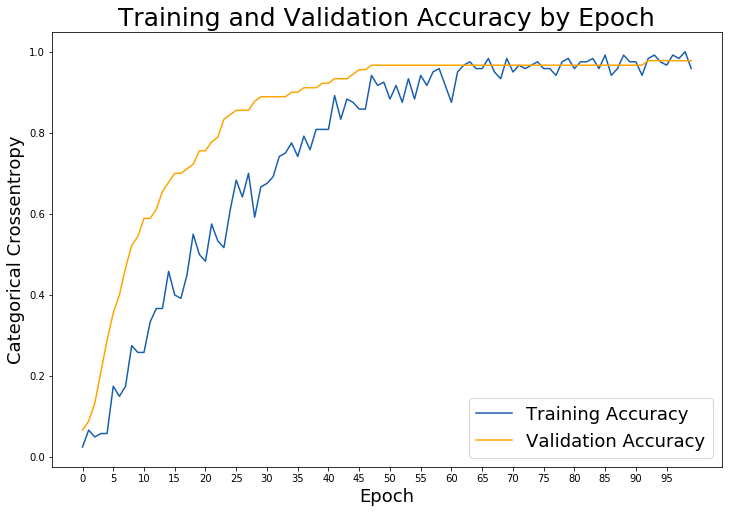

In [61]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [62]:
X_test

array([[ 0.87397   , -0.02050643, -0.06447332, ...,  0.32857708,
         0.39238681, -0.02301289],
       [-0.0268659 , -0.87851798, -1.22279443, ...,  0.28812387,
         0.06147072,  0.23667442],
       [-0.19932158, -1.39345053,  0.58054494, ...,  0.55037948,
         0.19639977, -0.47720468],
       ...,
       [-0.04682645,  3.27829654,  0.30961597, ...,  0.25912705,
         0.18795586,  0.36525634],
       [ 0.80489072, -1.35472102, -1.29074651, ..., -0.2488765 ,
        -0.11803239, -0.14208013],
       [-0.95949436,  0.74967546, -0.73778687, ...,  0.90772556,
         0.21757172, -0.64230494]])

In [63]:
# We get our predictions from the test data
predictions = model.predict_classes(X_test)

In [64]:
# We transform back our predictions to the speakers ids
predictions = lb.inverse_transform(predictions)

In [65]:
test_df['predictions'] = predictions

In [66]:
test_df.head()

,file,speaker,predictions
0,39-121914-0019.flac,39,39
1,87-121553-0057.flac,87,87
2,302-123516-0032.flac,302,302
3,118-47824-0062.flac,118,118
4,374-180298-0026.flac,374,374


In [67]:
test_df[test_df['speaker'] != test_df['predictions']]

,file,speaker,predictions


In [82]:
# Checking our model accuracy
print((1-round(len(test_df[test_df['speaker'] != test_df['predictions']])/len(test_df),3))*100,'%')

100.0 %


In [69]:
test_df[test_df['speaker'] == test_df['predictions']]

,file,speaker,predictions
0,39-121914-0019.flac,39,39
1,87-121553-0057.flac,87,87
2,302-123516-0032.flac,302,302
3,118-47824-0062.flac,118,118
4,374-180298-0026.flac,374,374
...,...,...,...
85,26-495-0003.flac,26,26
86,60-121082-0030.flac,60,60
87,60-121082-0029.flac,60,60
88,87-121553-0056.flac,87,87


In [78]:
((5/6)**35)*100

0.16929977788577963